In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve, average_precision_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [6]:
def get_data(datafile):
    dataframe = pd.read_csv(datafile)
    x = dataframe.drop("Class", axis=1)
    y = np.array(dataframe["Class"])

    scaler = StandardScaler()
    x["scaled_amount"] = scaler.fit_transform(x["Amount"].values.reshape(-1, 1))
    x= x.drop(["Amount","Time"],axis=1)

    return x.values, y

In [7]:
def split_data(x, y, val_size=0.2, random_state=42):
    ss_split = StratifiedShuffleSplit(n_splits=1, test_size=val_size, random_state=random_state)
    train_idx,val_idx = list(ss_split.split(x,y))[0]

    x_train, x_val = x[train_idx], x[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    return x_train, y_train, x_val, y_val

In [8]:
def run_logistic_regression(datafile):
    x, y = get_data(datafile)
    x_train,y_train, x_val, y_val = split_data(x, y)

    logreg = LogisticRegression(max_iter= 1000, solver="lbfgs", class_weight=None,n_jobs=-1,penalty="l2")

    logreg.fit(x_train, y_train)
    threshold = 0.8
    y_probs = logreg.predict_proba(x_val)[:, 1]
    y_pred = []
    for p in y_probs:
        if p >= 0.8:
            y_pred.append(1)
        else:
            y_pred.append(0)

    y_pred =np.array(y_pred)

    acc= accuracy_score(y_val, y_pred)
    error = 1-acc
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    print("\nLogistic Regression")
    print("Error: ", error)
    print("Accuracy: ", acc)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 score: ", f1)
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, y_pred))

    return logreg

In [ ]:
def run_neural_network(datafile):
    x, y = get_data(datafile)
    x_train, y_train, x_val, y_val = split_data(x, y)

    model = Sequential()
    model.add(Dense(32, activation="relu", input_dim=x_train.shape[1]))
    model.add(Dense(16, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer=Adam(learning_rate=0.001),loss="binary_crossentropy",metrics=["accuracy"])

    model.fit(x_train,
              y_train,
            epochs=10,
            batch_size=256,
            verbose=0)
    y_probs= model.predict(x_val).flatten()

    y_pred = []
    for p in y_probs:
        if p >= 0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)

    y_pred =np.array(y_pred)


    acc= accuracy_score(y_val, y_pred)
    error= 1-acc
    precision= precision_score(y_val, y_pred)
    recall= recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    print("\nNeural Network")
    print("Error: ", error)
    print("Accuracy: ", acc)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1-score: ", f1)
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, y_pred))

    return model

In [ ]:
if __name__ == "__main__":
    datafile = "creditcard.csv"

    logreg = run_logistic_regression(datafile)
    nn_model = run_neural_network(datafile)


Logistic Regression
Error:  0.0009480004213334725
Accuracy:  0.9990519995786665
Precision:  0.8333333333333334
Recall:  0.5612244897959183
F1 score:  0.6707317073170732
Confusion Matrix:
[[56853    11]
 [   43    55]]


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 949us/step

Neural Network
Error:  0.0005793335908149677
Accuracy:  0.999420666409185
Precision:  0.8350515463917526
Recall:  0.826530612244898
F1-score:  0.8307692307692308
Confusion Matrix:
[[56848    16]
 [   17    81]]


In [ ]:
df = pd.read_csv(datafile)
#create scaled_amount like in get_data but keep it inside df for plotting
scaler = StandardScaler()
df["scaled_amount"] = scaler.fit_transform(df["Amount"].values.reshape(-1, 1))
df_model = df.drop(["Amount", "Time"], axis=1)
X = df_model.drop("Class", axis=1)
y = df_model["Class"].values
feature_names = X.columns.tolist()

In [ ]:
plt.rcParams.update({
    "figure.facecolor": "#050816", #dark navy
    "axes.facecolor":   "#050816",
    "axes.edgecolor":   "#FFFFFF",
    "axes.labelcolor":  "#FFFFFF",
    "text.color":       "#FFFFFF",
    "xtick.color":      "#A0AEC0",
    "ytick.color":      "#A0AEC0",
    "axes.titleweight": "bold",
    "axes.titlepad":    12,
    "font.size":        12,
    "figure.dpi":       120
})

ACCENT_BLUE = "#38BDF8" #cyan
ACCENT_PINK = "#F472B6" #neon pink

In [ ]:
x_all = X.values
x_train, y_train, x_val, y_val = split_data(x_all, y)

#getting probabilities and predictions from already trained models
threshold_lr = 0.8
threshold_nn = 0.5

y_probs_lr = logreg.predict_proba(x_val)[:, 1]
y_probs_nn = nn_model.predict(x_val).flatten()
y_pred_lr = (y_probs_lr >= threshold_lr).astype(int)
y_pred_nn = (y_probs_nn >= threshold_nn).astype(int)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 936us/step


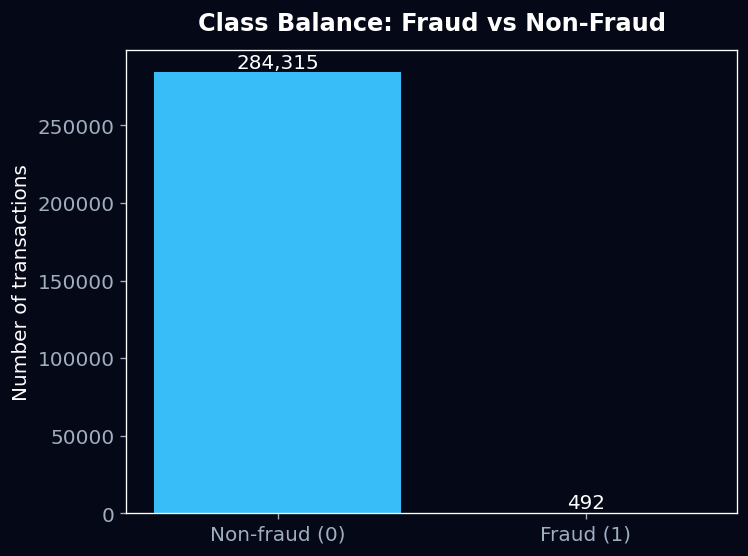

In [ ]:
fig, ax = plt.subplots()
counts = df["Class"].value_counts().sort_index()
bars = ax.bar(
    ["Non-fraud (0)", "Fraud (1)"],
    counts.values,
    color=[ACCENT_BLUE, ACCENT_PINK]
)
ax.set_title("Class Balance: Fraud vs Non-Fraud")
ax.set_ylabel("Number of transactions")
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{int(height):,}",
        ha="center",
        va="bottom",
        color="#FFFFFF"
    )
plt.tight_layout()
plt.show()

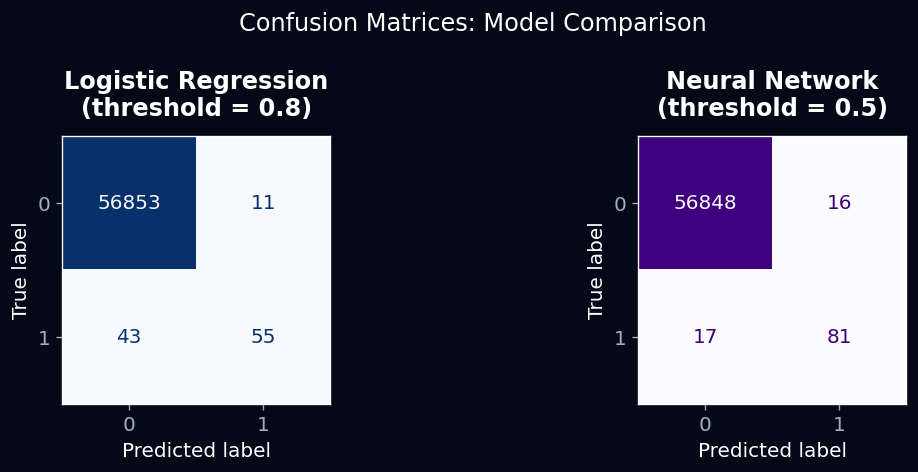

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ConfusionMatrixDisplay.from_predictions(
    y_val,
    y_pred_lr,
    ax=axes[0],
    cmap="Blues",
    colorbar=False
)
axes[0].set_title("Logistic Regression\n(threshold = 0.8)", color="#FFFFFF")
ConfusionMatrixDisplay.from_predictions(
    y_val,
    y_pred_nn,
    ax=axes[1],
    cmap="Purples",
    colorbar=False
)
axes[1].set_title("Neural Network\n(threshold = 0.5)", color="#FFFFFF")
plt.suptitle("Confusion Matrices: Model Comparison", color="#FFFFFF")
plt.tight_layout()
plt.show()

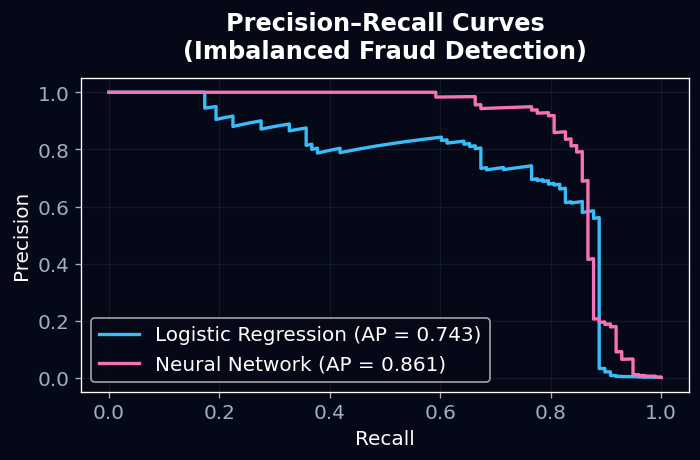

In [ ]:
precision_lr, recall_lr, _ = precision_recall_curve(y_val, y_probs_lr)
precision_nn, recall_nn, _ = precision_recall_curve(y_val, y_probs_nn)
ap_lr = average_precision_score(y_val, y_probs_lr)
ap_nn = average_precision_score(y_val, y_probs_nn)

plt.figure(figsize=(6, 4))
plt.plot(
    recall_lr, precision_lr,
    label=f"Logistic Regression (AP = {ap_lr:.3f})",
    linewidth=2, color=ACCENT_BLUE
)
plt.plot(
    recall_nn, precision_nn,
    label=f"Neural Network (AP = {ap_nn:.3f})",
    linewidth=2, color=ACCENT_PINK
)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curves\n(Imbalanced Fraud Detection)")
plt.legend()
plt.grid(alpha=0.2, color="#4A5568")
plt.tight_layout()
plt.show()

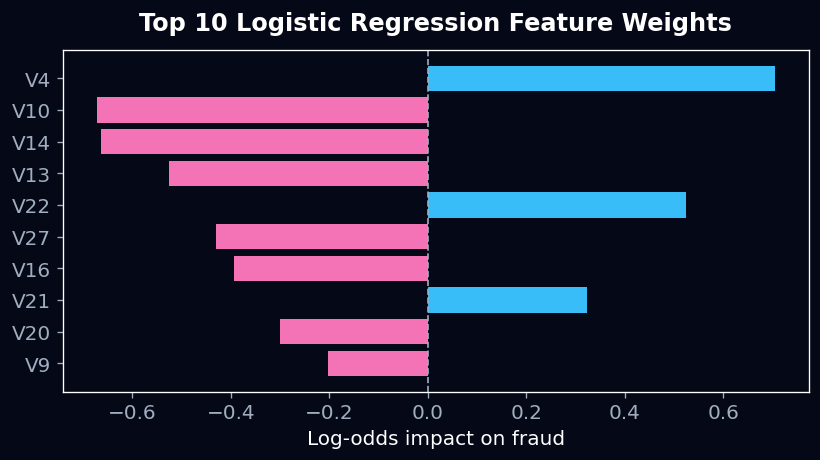

In [ ]:
coef = logreg.coef_[0]
coef_df = pd.DataFrame({
    "feature": feature_names,
    "coef": coef,
    "abs_coef": np.abs(coef)
}).sort_values("abs_coef", ascending=False)

top = coef_df.head(10)
fig, ax = plt.subplots(figsize=(7, 4))
colors = [ACCENT_BLUE if c > 0 else ACCENT_PINK for c in top["coef"]]
ax.barh(top["feature"], top["coef"], color=colors)
ax.axvline(0, linestyle="--", color="#A0AEC0", linewidth=1)

ax.set_xlabel("Log-odds impact on fraud")
ax.set_title("Top 10 Logistic Regression Feature Weights")
ax.invert_yaxis()

plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


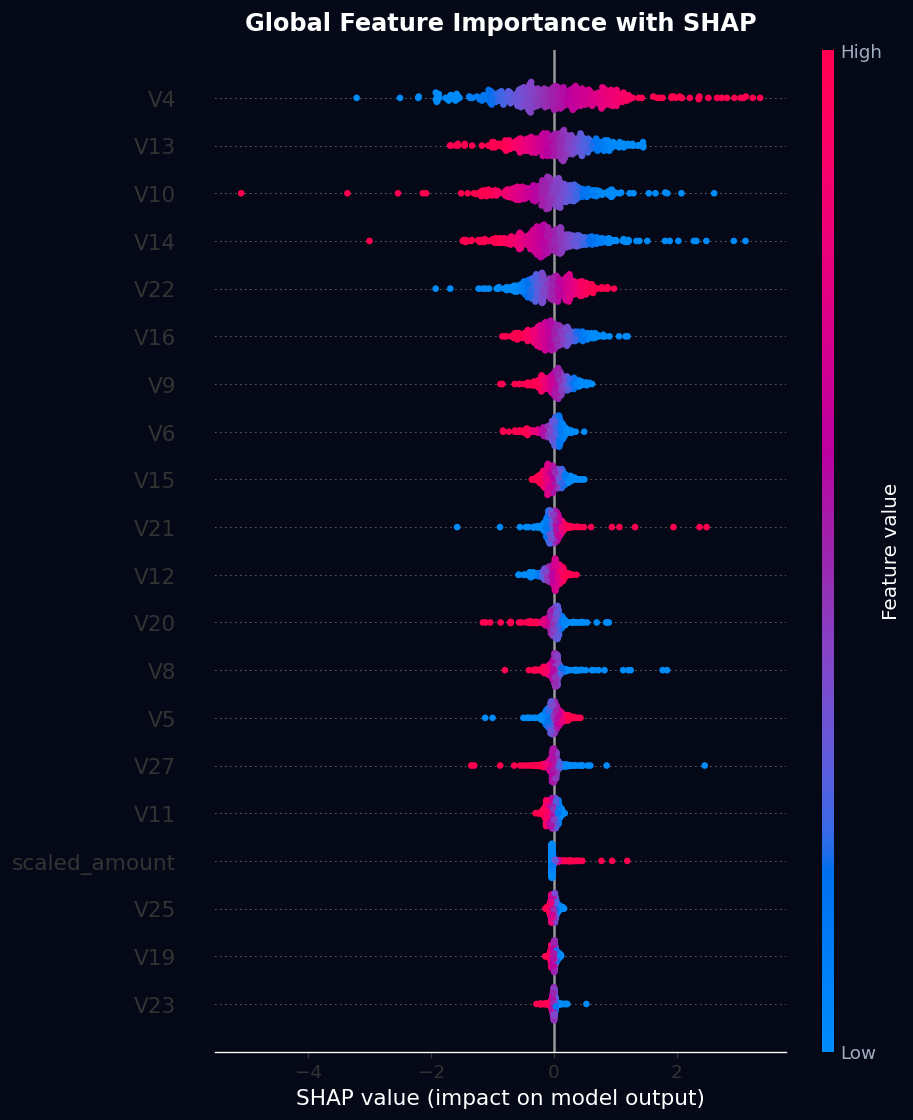

In [ ]:
!pip install shap
import shap
shap.initjs()
#using a sample of X as background for SHAP
background = X.sample(500, random_state=42).values

explainer = shap.LinearExplainer(
    logreg,
    background,
    feature_perturbation="interventional"
)
X_sample = X.sample(500, random_state=0)
shap_values = explainer.shap_values(X_sample.values)
plt.figure(figsize=(7, 4))
shap.summary_plot(
    shap_values,
    X_sample,
    feature_names=feature_names,
    show=False
)
plt.gcf().set_facecolor("#050816")
plt.title("Global Feature Importance with SHAP", color="#FFFFFF")
plt.tight_layout()
plt.show()